# 💁🏻‍♀️프로젝트 요약

- 프로젝트 명: [미니프로젝트] EDA 프로젝트
- 프로젝트 설명:  패스트캠퍼스 고객 데이터로 판매 분석 및 시각화
- 목표:
    - Pandas 및 데이터 시각화 스킬 익히기
    - 패스트캠퍼스 고객 데이터에서 다양한 인사이트 출력하기
- 결과
    - 매출분석
        - 시간대별 매출 그래프 => 저녁시간대 부터 자정까지 매출비중이 높은것을 알 수 있음
        - 요일별 매출 그래프 => 주말에 매출 비중이 높은 것을 알 수 있음
        - 일별 매출 그래프 => 월말에 매출 비중이 높은 것을 알 수 있음
        - 주별 매출 그래프 => 35주차경 매출 비중이 높은 것을 알 수 있음
        - 월별 매출 그래프 => 8월에 매출 비중이 높은 것을 알 수 있음
    - 강의 분석
        - 전체 강의 수 => 610개
        - 전체 카테고리 수 => 14개
        - 가장 많은 매출의 강의 
        - 가장 적은 매출의 강의 
        - 가장 많은 매출의 카테고리 => “프로그래밍”
        - 가장 적은 매출의 카테고리 => “파이낸스”
    - 수강신청 행동 패턴 분석
        - 가장 취소를 많이 한 강의 => “초격차 패키지 : 한 번에 끝내는 프론트엔드 개발”
        - 가장 취소를 적게 한 강의 => 20강의 이상이 1번임

# 외부 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # window용
matplotlib.rcParams['font.size'] = 11  # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

# 매출 분석

## 매출 정의

> 매출은 'type' 컬럼의 값이 'PAYMENT' 또는 'REFUND' 이면서 'state' 컬럼의 값이 'COMPLETED' 인 값들의 합으로 정의

# 시간대별 매출 그래프


### 시간대별 구매 횟수 (시간대별 활성화 정도)
> 언제 사람들이 많이 이용하는지 알 수 있음.

<AxesSubplot:xlabel='hour', ylabel='count'>

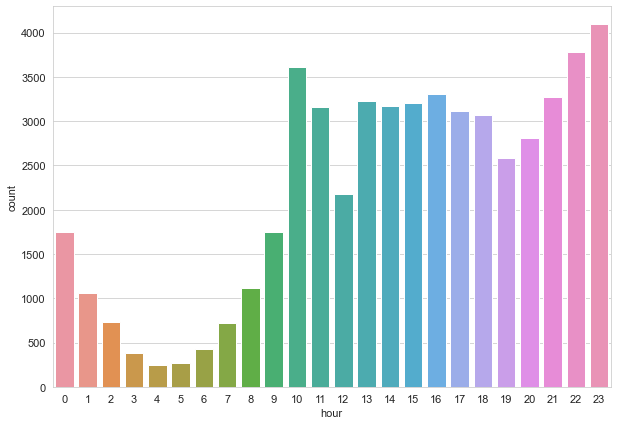

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=prc, x = 'hour')

### 시간대별 매출액

> 저녁시간대 부터 자정까지 매출비중이 높은것을 알 수 있음.

C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\

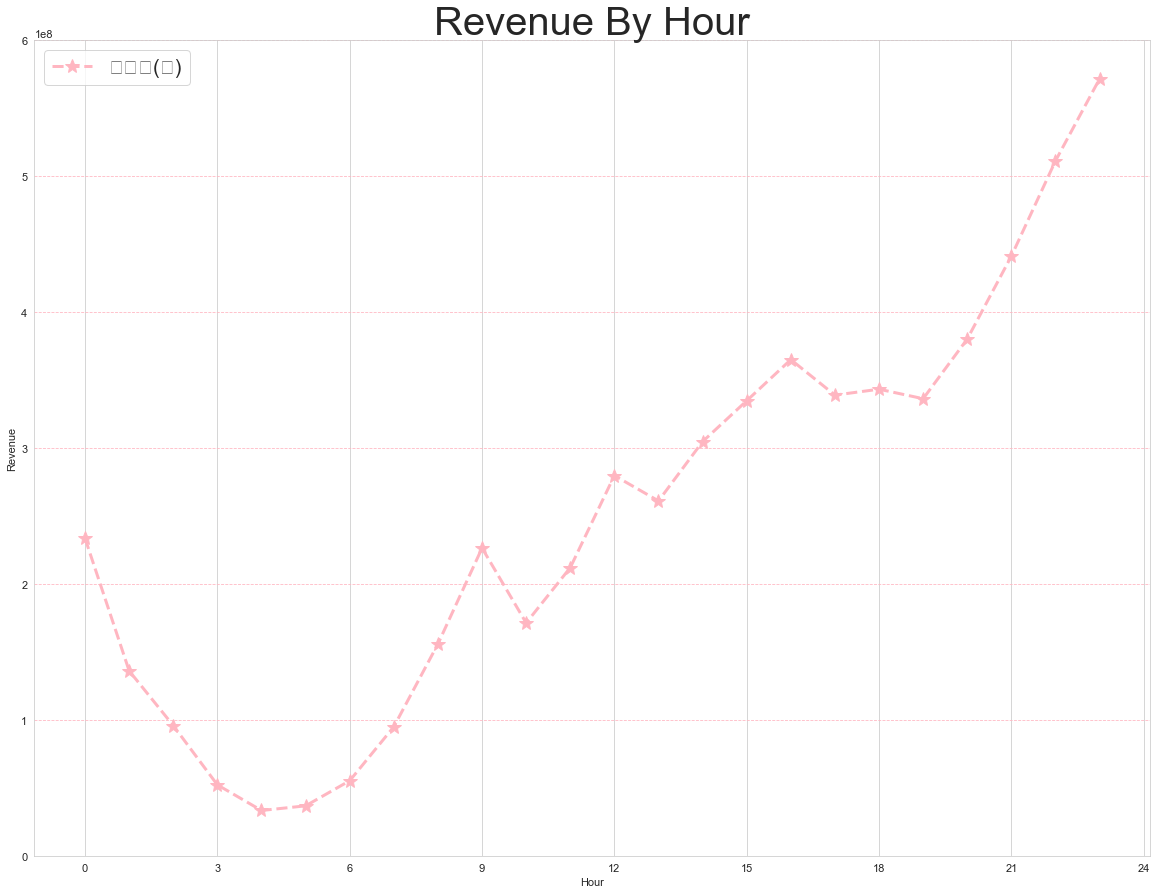

In [11]:
plt.figure(figsize=(20,15))
plt.plot(prc_hour, label='매출액(억)', marker = '*', markersize=15, color = 'lightpink',ls = '--',lw = 3)
plt.ylim([0,600000000])
plt.xticks([0,3,6,9,12,15,18,21,24])
plt.title('Revenue By Hour', fontsize=40)
plt.xlabel('Hour', )
plt.ylabel('Revenue')
plt.legend(loc='upper left', fontsize=20)
plt.grid(axis='y', color = 'lightpink', ls = '--')

plt.show()

### 시간대별 매출 Pie Graph
> 파이 차트를 살펴보면 오후 5시부터 자정까지 7시간동안의 매출이 전체매출의 50% 이상을 차지하는것을 알 수 있음.

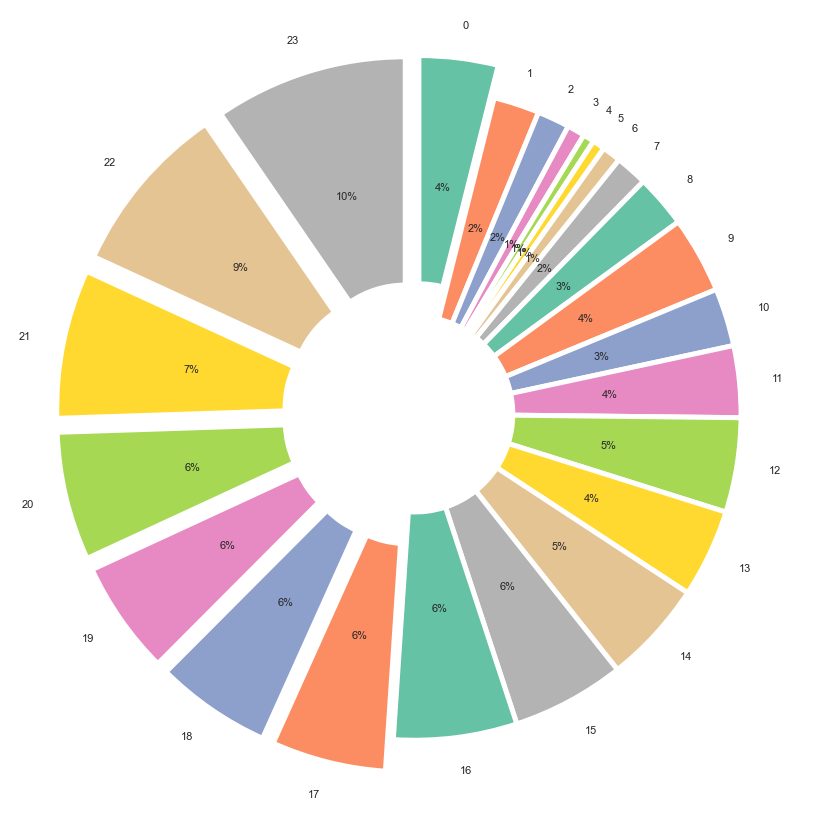

In [12]:
labels = [i for i in range(0,24)]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = sns.color_palette("Set2")
explode = [0.10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]

plt.figure(figsize=(15,15))
plt.pie(prc_hour.transaction_amount,
        labels = labels,
        counterclock=False,
        autopct='%0.0f%%',
        startangle= 90,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors
       
       
       )
plt.show()

### 요일별 매출 그래프
>요일별 매출을 분석해보면 일요일 매출이 가장높고 토요일 매출이 가장낮지만 요일별 편차가 크지 않은것을 알 수 있음.

C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascienc

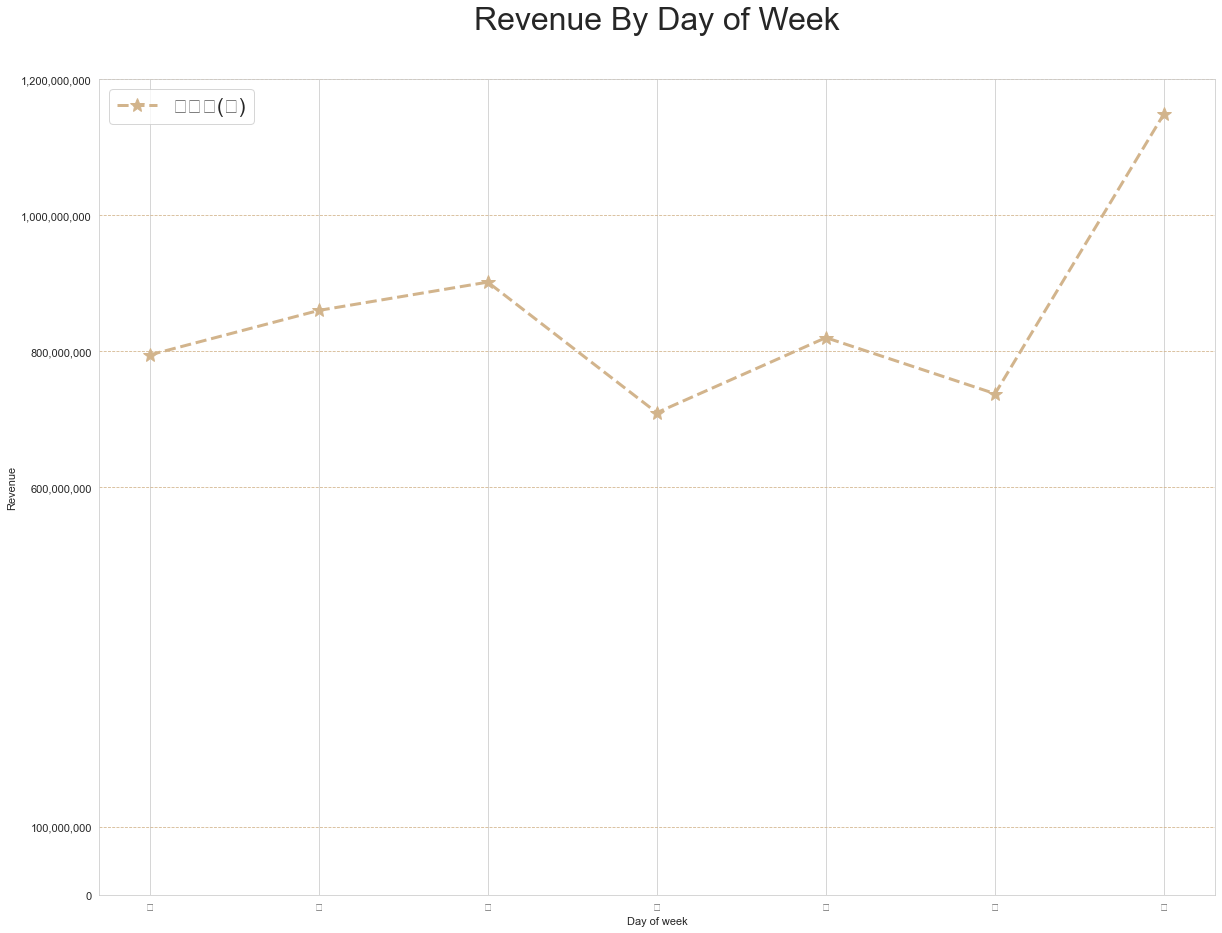

In [14]:
plt.figure(figsize=(20,15))
plt.plot(prc_dweek, marker='*', label = '매출액(억)', ls = '--', color = 'tan',linewidth = 3,ms = 15)
plt.yticks([0, 100000000, 600000000, 800000000, 1000000000 ,1200000000], 
           ['0','100,000,000', '600,000,000', '800,000,000', '1,000,000,000' ,'1,200,000,000'])
plt.xticks([0,1,2,3,4,5,6],['월','화','수','목','금','토','일'])

plt.title("Revenue By Day of Week", fontsize=32, pad=50)
plt.xlabel('Day of week', )
plt.ylabel('Revenue')
plt.grid(axis='y',color ='tan', ls='--')
plt.set_facecolor = 'lightgray'
plt.legend(loc = 'upper left', fontsize =20)

plt.show()

### 일별 매출 그래프
>매출이 월말에 집중되는 경향이있음.

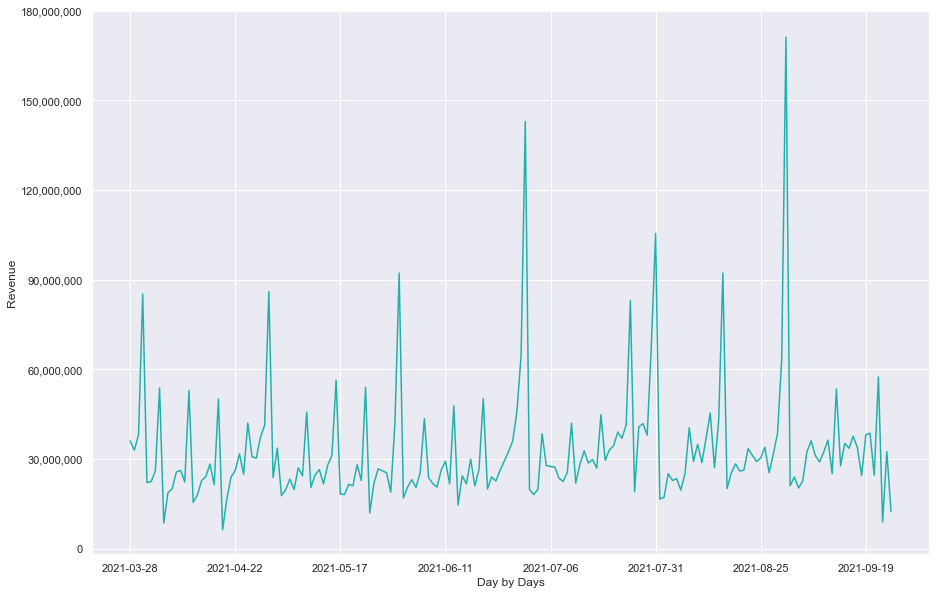

In [17]:
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

prc_days.plot(color='#20B2AA')
plt.xlabel('Day by Days')
plt.ylabel('Revenue')
plt.yticks([0, 30000000, 60000000, 90000000, 120000000, 150000000 ,180000000], 
           ['0','30,000,000','60,000,000', '90,000,000', '120,000,000', '150,000,000' ,'180,000,000'])
plt.show()

### 일자별 매출 그래프
>매출이 월말에 집중되는 경향이있음.

C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\earth\anaconda3\envs\datascience\

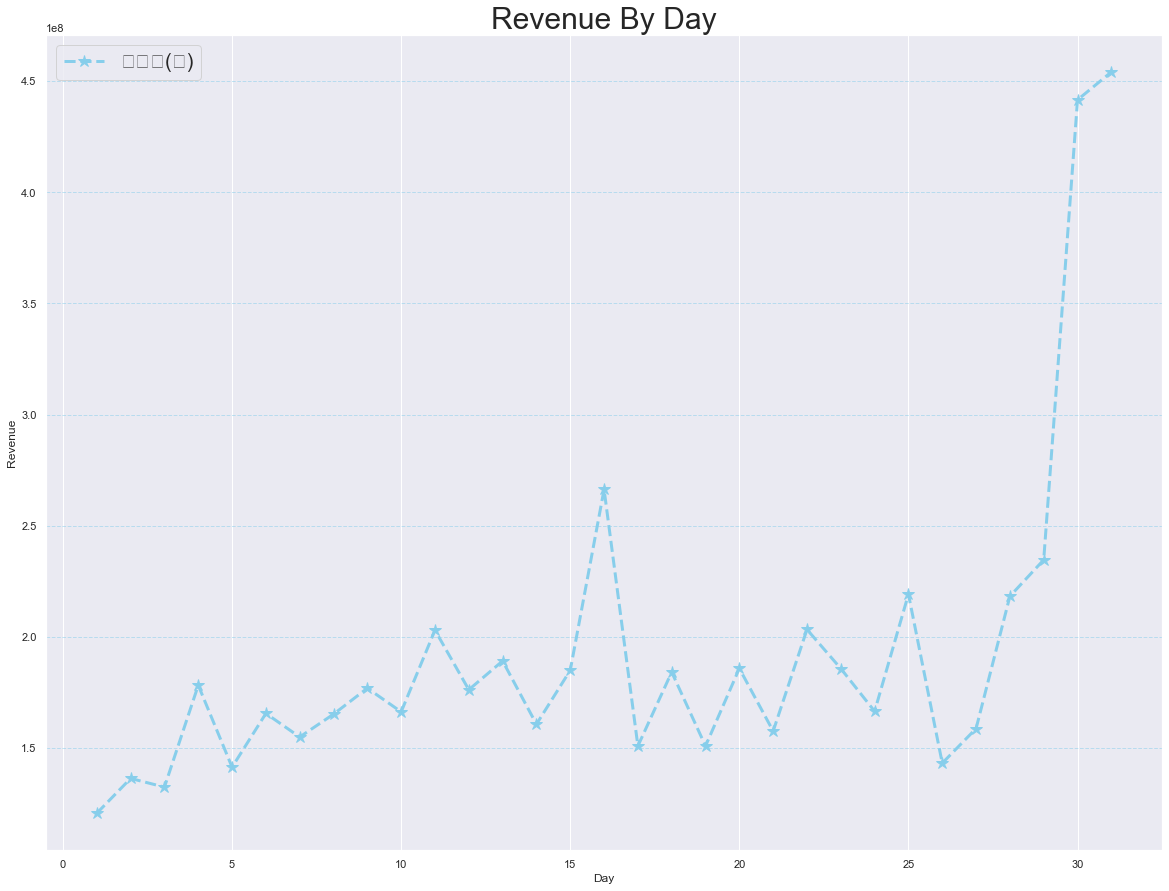

In [20]:
plt.figure(figsize=(20,15))
plt.plot(prc_day, marker = '*',ms=12, ls='--',lw=3, color = 'skyblue',label='매출액(억)')
plt.title("Revenue By Day", fontsize=30)
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.grid(axis='y',color='skyblue',ls='--',alpha=0.5)
plt.legend(loc='upper left', fontsize=20)
plt.show()

# 강의 분석

### TOP 10 강의 개별 판매추의 그래프

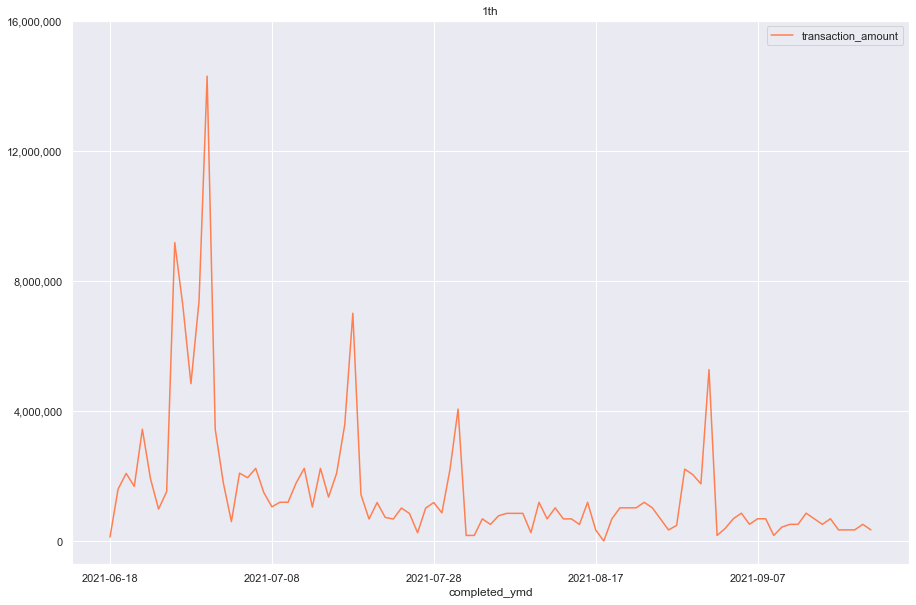

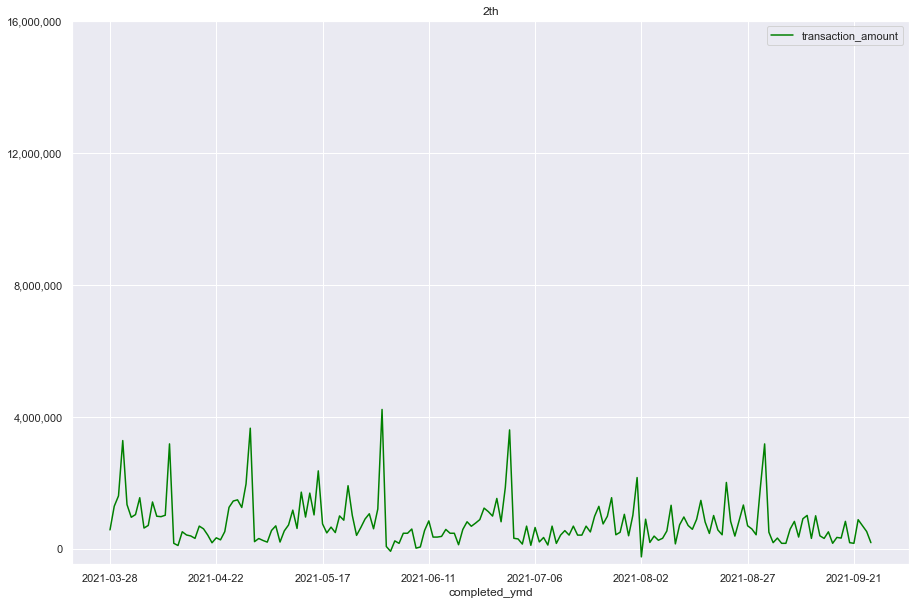

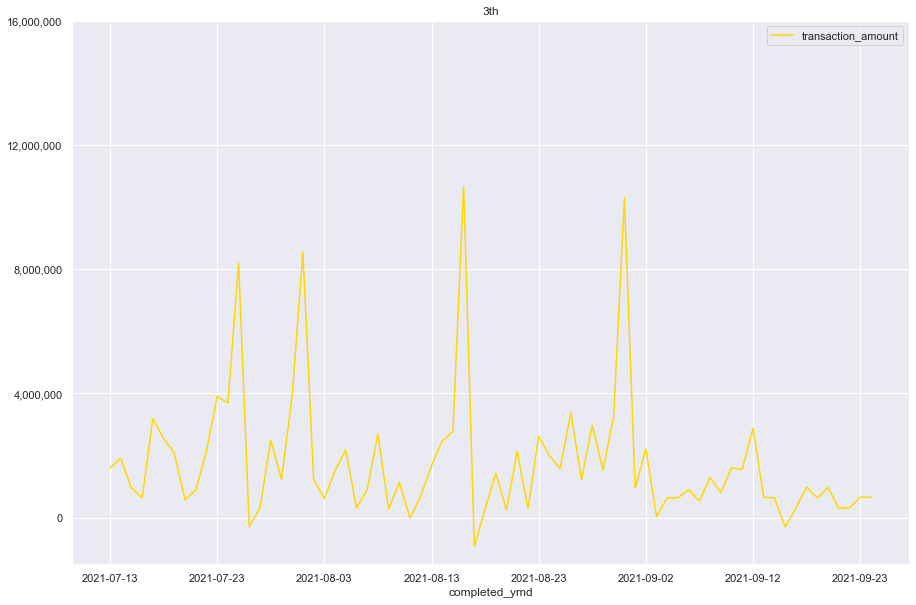

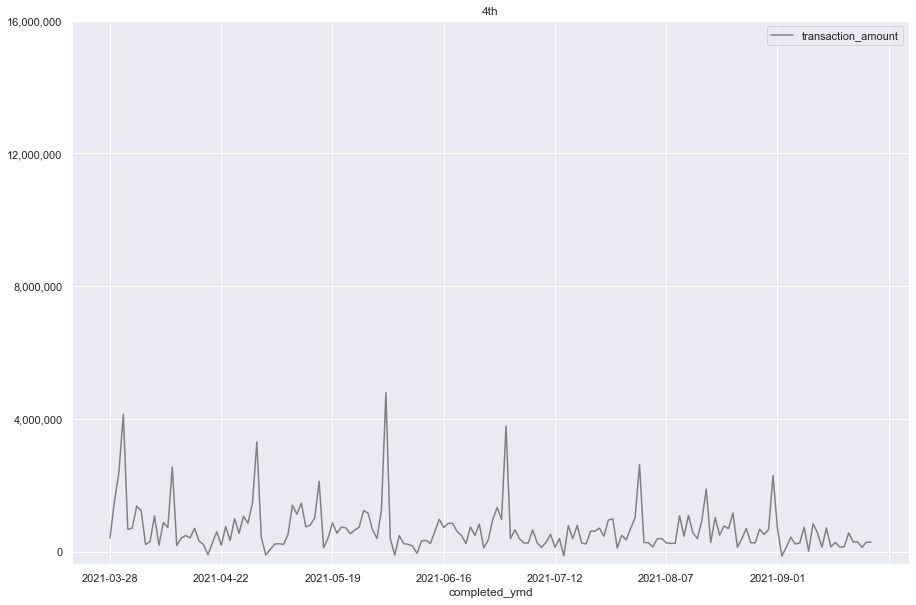

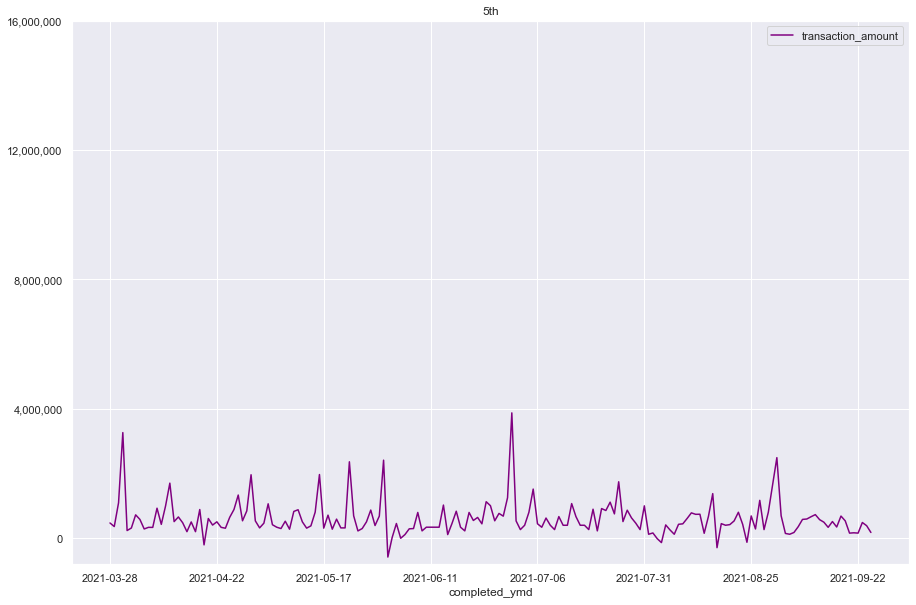

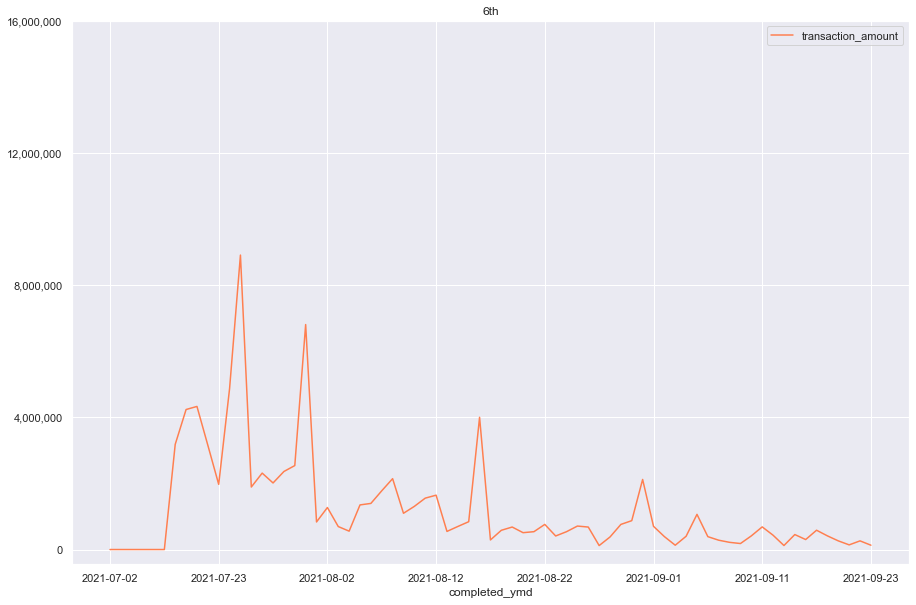

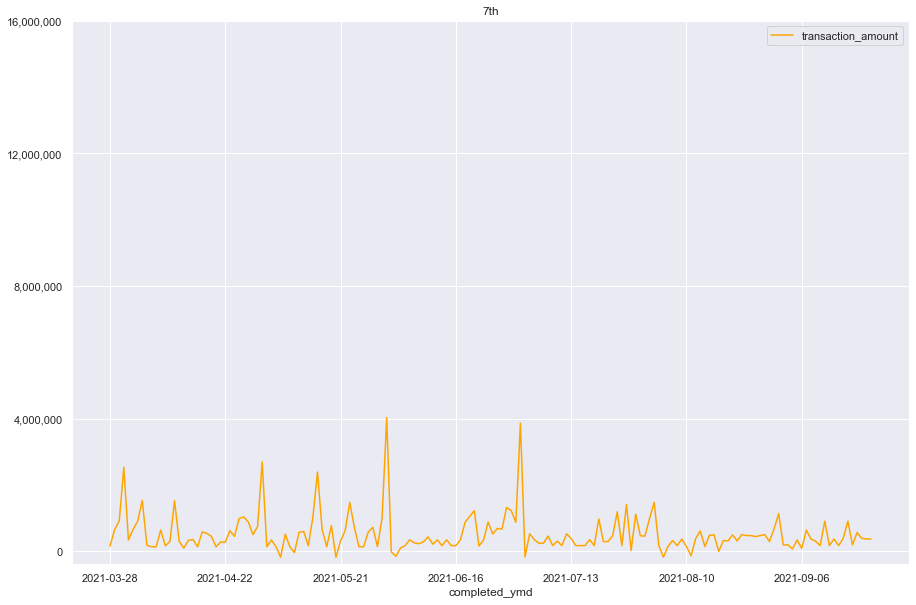

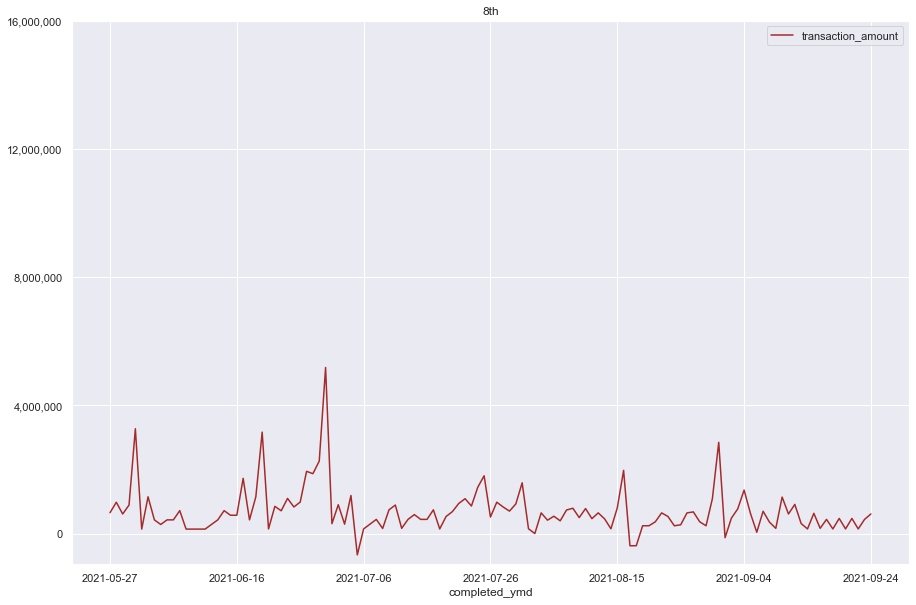

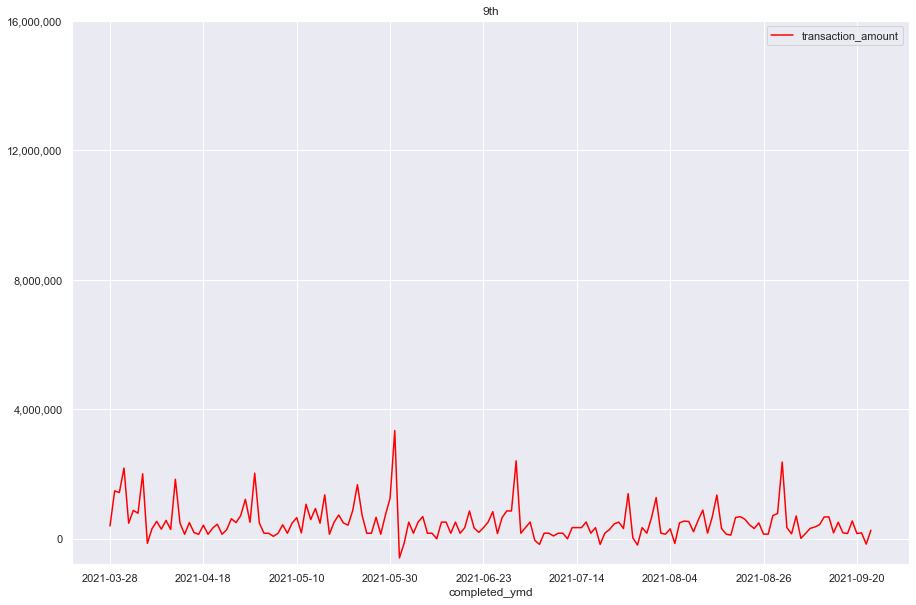

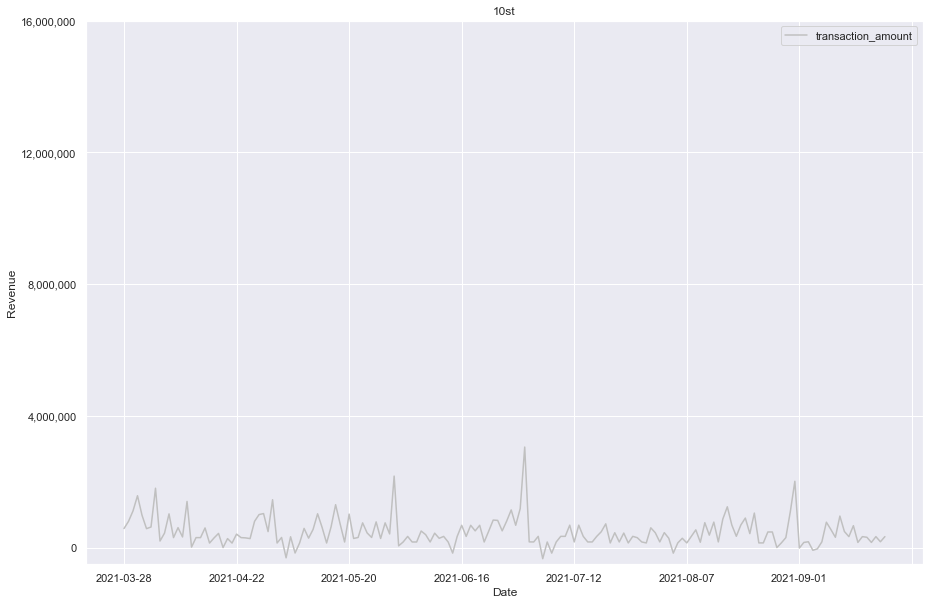

In [35]:
# The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법',
# 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발',
# 올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략',
# 초격차 패키지 : 한번에 끝내는 영상 촬영과 편집',
# 초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터',
# 나의 칼퇴치트키 엑셀유치원',
# 초격차 패키지 : 한번에 끝내는 디자인 툴',
# 올인원 패키지 : star741의 캐주얼 일러스트 드로잉',
# 올인원 패키지 : 완전정복 시각디자인 기초',
# 초격차 패키지 : 한번에 끝내는 UX/UI 디자인'
plt.rcParams["figure.figsize"] = (15,10)
sns.set_theme(style="darkgrid")
course_1th.plot(color='coral', title='1th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_2th.plot(color='green', title='2th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_3th.plot(color='gold', title='3th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_4th.plot(color='gray', title='4th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_5th.plot(color='purple', title='5th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_6th.plot(color='coral', title='6th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_7th.plot(color='orange', title='7th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_8th.plot(color='brown', title='8th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_9th.plot(color='red', title='9th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_10th.plot(color='silver', title='10st')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

### 카테고리별 매출 비중

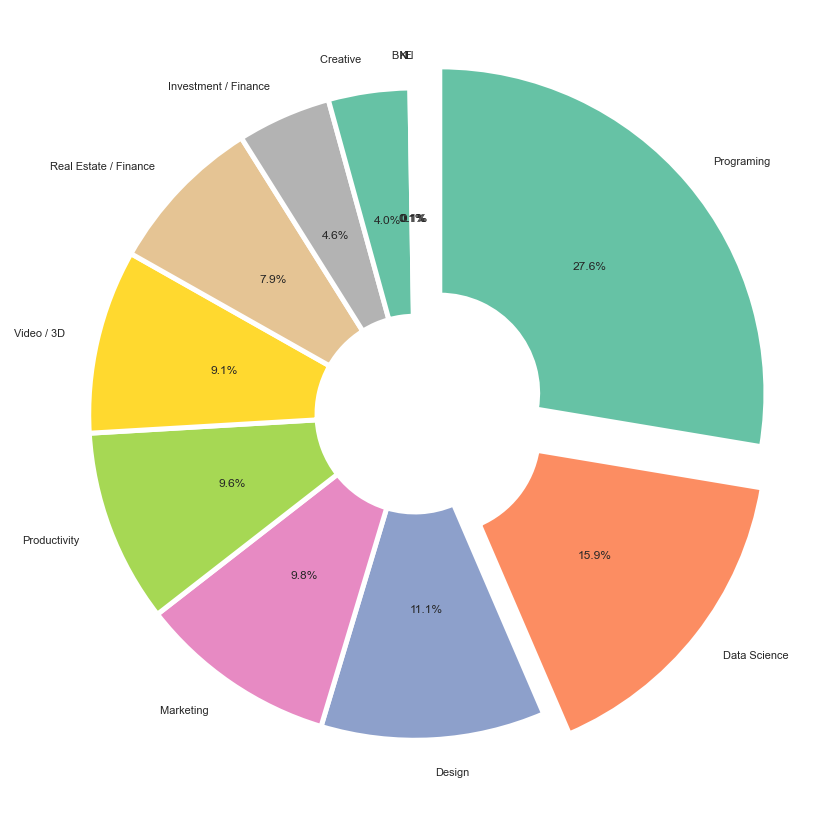

In [40]:
prc_categorys_df = pd.DataFrame(prc_categorys)
labels = ['Programing', 'Data Science', 'Design', 'Marketing ', 'Productivity', 'Video / 3D', 'Real Estate / Finance','Investment / Finance','Creative ', 'BN ','KL', 'FI']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.10, 0.10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
colors = sns.color_palette("Set2")


plt.figure(figsize=(15,15))
plt.pie(prc_categorys_df.transaction_amount,
        labels = labels,
        autopct= '%0.1f%%',
        counterclock=False,
        startangle= 90,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors
       )
plt.show()

## 기존 PG사 vs 신규 PG사 점유율 현황

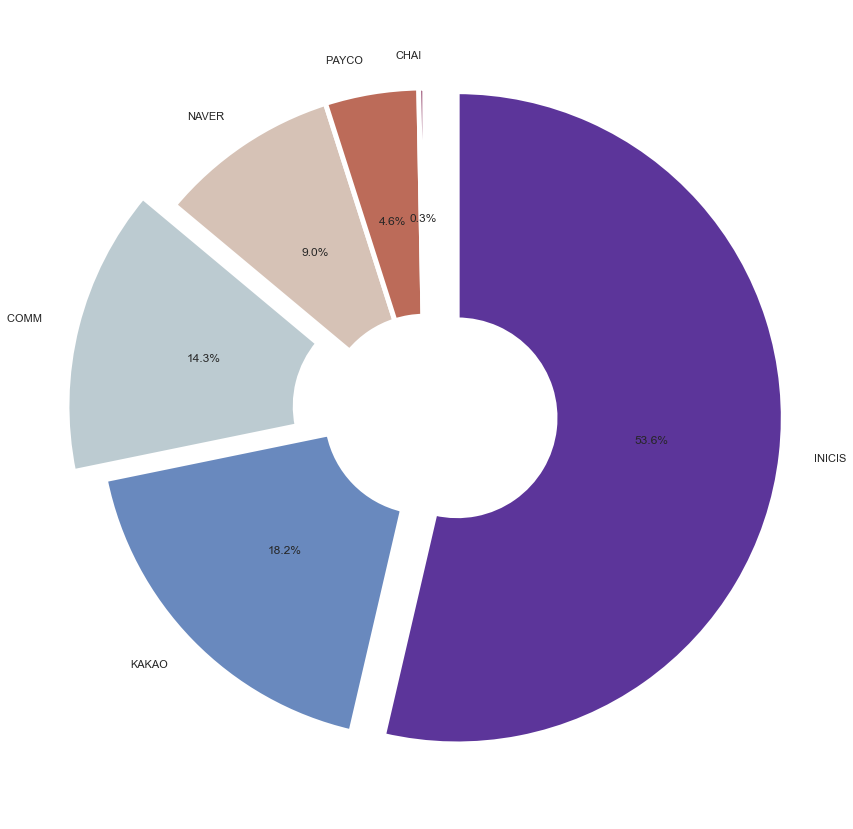

In [47]:
total_tr = pf_share.pg.sum()
pf_share['share_rate'] = round((pf_share.pg/total_tr * 100), 2)
pf_share

labels = ['INICIS', 'KAKAO', 'COMM ', 'NAVER', 'PAYCO ', 'CHAI']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.10, 0, 0.10, 0, 0, 0]
colors = sns.color_palette("twilight_shifted")


plt.figure(figsize=(15,15))
plt.pie(pf_share.pg,
        labels = labels,
        autopct='%0.1f%%',
        counterclock=False,
        startangle= 90,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors
       )
plt.show()


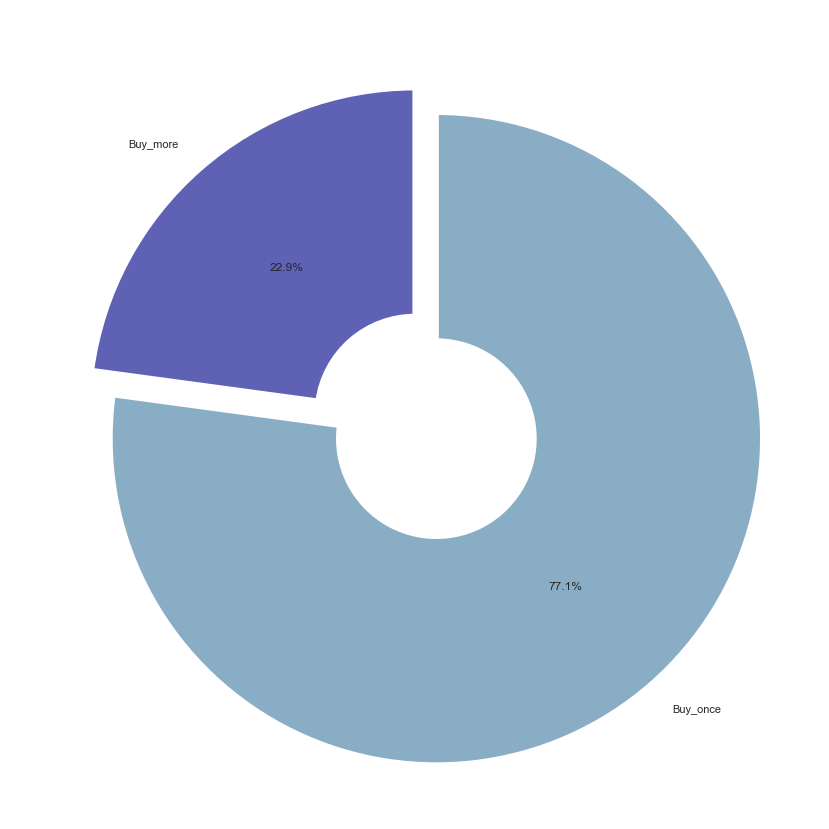

In [177]:
labels = ['Buy_once', 'Buy_more']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.10, 0]
colors = sns.color_palette("twilight")
cus_pie = [29397,8711]

plt.figure(figsize=(15,15))
plt.pie(cus_pie,
        labels = labels,
        autopct='%0.1f%%',
        counterclock=False,
        startangle= 90,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors
       )
plt.show()


### ⚒️ 활용 Tool & Skill

- Python, Numpy, Pandas
- Matplotlib, Seaborn

### 💡 배운 점

- 팀 프로젝트 : 처음으로 참여해본 팀프로젝트라는 점에서 의미가 있었습니다. 팀원분들과 프로젝트 진행순서, 방향, 역할 분배 등에 대해 적극 소통하였고 그 덕분에 원하는 방향으로 결과물을 낼 수 있었습니다.
- 전처리 : 판다스를 주로 사용하였습니다. 처음에는 결측치가 많아서 어떻게 처리를 해야할지 많이 고민했습니다. 결측치로 인해 제거해야 할 로우와 대체값으로 채울 로우에 대해 팀원과 꾸준히 소통하였습니다.
- 시각화 : 직접 눈으로 확인해보니 데이터를 이해하기 쉬웠습니다.